## Flight Data Analysis 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

##  This case study to get the answer of below mentioned problems 


Q.1 What are the airlines in the dataset, accompanied by their frequencies?
Q.2. Show Bar Graphs representing the Departure Time & Arrival Time.
Q.3. Show Bar Graphs representing the Source City & Destination City.
Q.4. Does price varies with airlines ?
Q.5. Does ticket price change based on the departure time and arrival time?
Q.6. How the price changes with change in Source and Destination?
Q.7. How is the price affected when tickets are bought in just 1 or 2 days before departure?
Q.8. How does the ticket price vary between Economy and Business class?
Q.9. What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class ?

## Loading data 

In [2]:
df=pd.read_csv("~/Desktop/Git-folder/Data_Sets/airlines_flights_data.csv")
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


## EDA  & Cleaning 

In [3]:
## Checking for null 

In [4]:
df.isnull().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
df.drop("index",axis=1,inplace=True)

In [6]:
print(f"shape= {df.shape}\
,size= {df.size}")

shape= (300153, 11),size= 3301683


In [7]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [8]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


## What are the airlines in the dataset, accompanied by their frequencies?

In [9]:
# so for no of airlines

df.columns
print(df["airline"].value_counts())
df['airline'].unique()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64


array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [10]:
print(f"What are the airlines in the dataset, accompanied by their frequencies?\
{df["airline"].value_counts()} and {df['airline'].unique()}")

What are the airlines in the dataset, accompanied by their frequencies?airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64 and ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']


## Exploring the relation of Price with Airline 

In [11]:
df.groupby("airline")["price"].agg(["mean","min","max"])

,mean,min,max
airline,,,
AirAsia,4091.072742,1105,31917
Air_India,23507.019112,1526,90970
GO_FIRST,5652.007595,1105,32803
Indigo,5324.216303,1105,31952
SpiceJet,6179.278881,1106,34158
Vistara,30396.536302,1714,123071


Text(0.5, 1.0, 'Airline - Price(Min,Max,Mean) ')

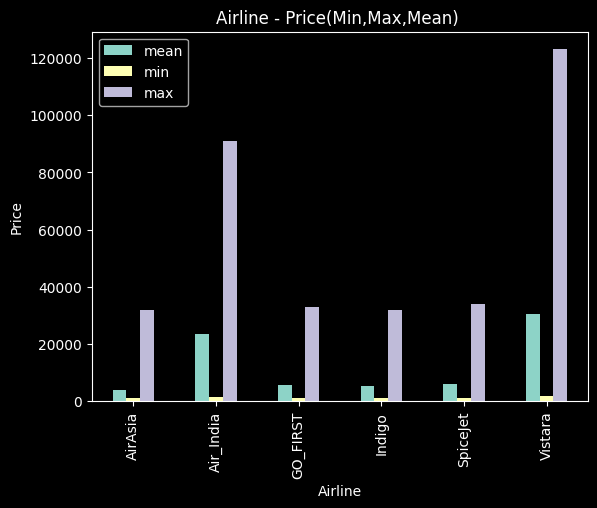

In [12]:
plt.style.use('dark_background')
df.groupby("airline")["price"].agg(["mean","min","max"]).plot(kind="bar")
plt.xlabel("Airline")
plt.ylabel("Price")
plt.title("Airline - Price(Min,Max,Mean) ")

In [13]:
airline_price=df.groupby("airline")["price"].agg(["mean","min","max"])

In [14]:
airline_price.index

Index(['AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara'], dtype='object', name='airline')

In [15]:
airline_price.values

array([[  4091.07274196,   1105.        ,  31917.        ],
       [ 23507.0191119 ,   1526.        ,  90970.        ],
       [  5652.00759505,   1105.        ,  32803.        ],
       [  5324.21630334,   1105.        ,  31952.        ],
       [  6179.27888137,   1106.        ,  34158.        ],
       [ 30396.53630171,   1714.        , 123071.        ]])

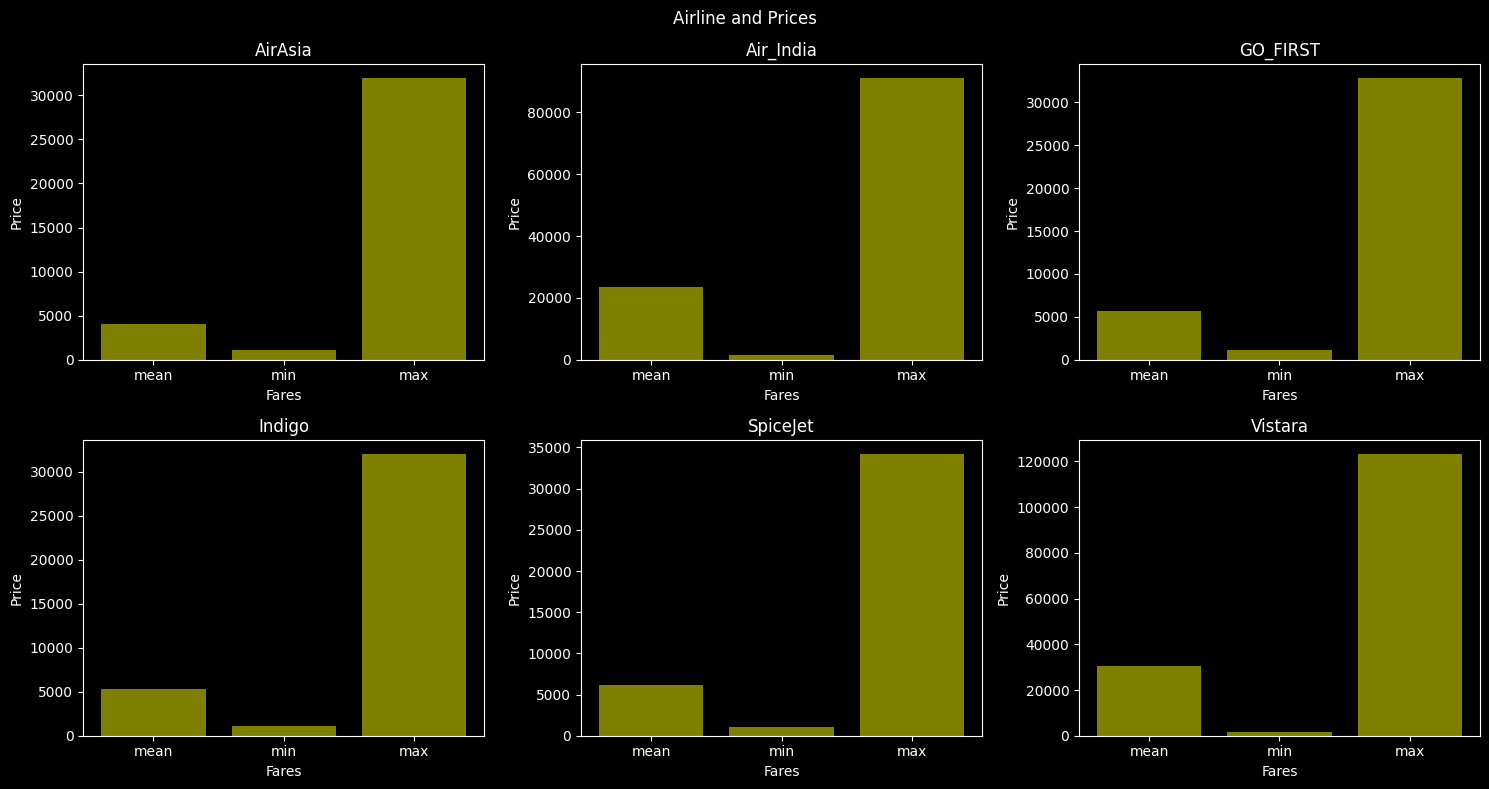

In [16]:
plt.figure(figsize=(15,8))
for index,value in enumerate(airline_price.index):
    plt.subplot(2,3,1+index)
    plt.bar(airline_price.columns,airline_price.loc[value],color=["olive"])
    plt.title(value)
    plt.ylabel("Price")
    plt.xlabel("Fares")
plt.suptitle("Airline and Prices")
plt.tight_layout()
    

## Yes, Price varies with airline 

In [17]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

## Exploring Relation with departure_time and arrival_time

In [18]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of No. of Flights with departure_time')

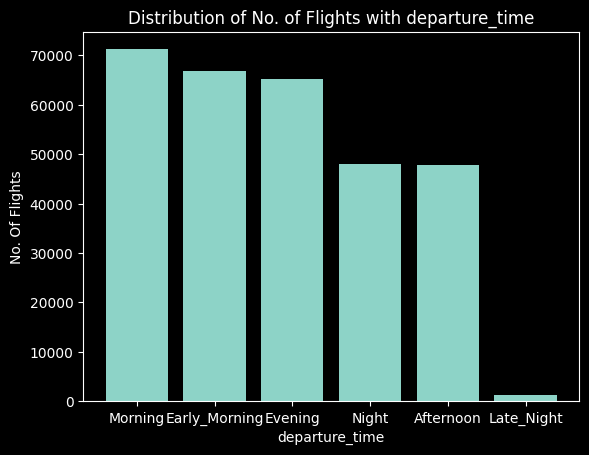

In [19]:
plt.bar(df['departure_time'].value_counts().index,
       df['departure_time'].value_counts().values)
plt.xlabel("departure_time")
plt.ylabel("No. Of Flights")
plt.title("Distribution of No. of Flights with departure_time")

In [20]:
df["arrival_time"].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In [21]:
airline_arrivaltime=df.groupby(["arrival_time","airline"])["airline"].agg(["count"])

In [22]:
airline_arrivaltime

count
arrival_time  airline         
Afternoon     AirAsia     2052
              Air_India  11576
              GO_FIRST    3373
              Indigo      7367
              SpiceJet     844
              Vistara    12927
Early_Morning AirAsia     1407
              Air_India   3405
              GO_FIRST    2705
              Indigo      2537
              SpiceJet     721
              Vistara     4642
Evening       AirAsia     2762
              Air_India  18748
              GO_FIRST    4503
              Indigo     11591
              SpiceJet    1403
              Vistara    39316
Late_Night    AirAsia     3491
              Air_India   2090
              GO_FIRST    2778
              Indigo      3455
              SpiceJet     456
              Vistara     1731
Morning       AirAsia     2909
              Air_India  20521
              GO_FIRST    2761
              Indigo      5469
              SpiceJet    2525
              Vistara    28550
Night         AirAsia     3477
              Air_India  24552
              GO_FIRST    7053
              Indigo     12701
              SpiceJet    3062
              Vistara    40693

In [23]:
series_arrival = series_arrival = airline_arrivaltime.index.get_level_values("arrival_time").unique()

series_arrival

Index(['Afternoon', 'Early_Morning', 'Evening', 'Late_Night', 'Morning',
       'Night'],
      dtype='object', name='arrival_time')

<function matplotlib.pyplot.show(close=None, block=None)>

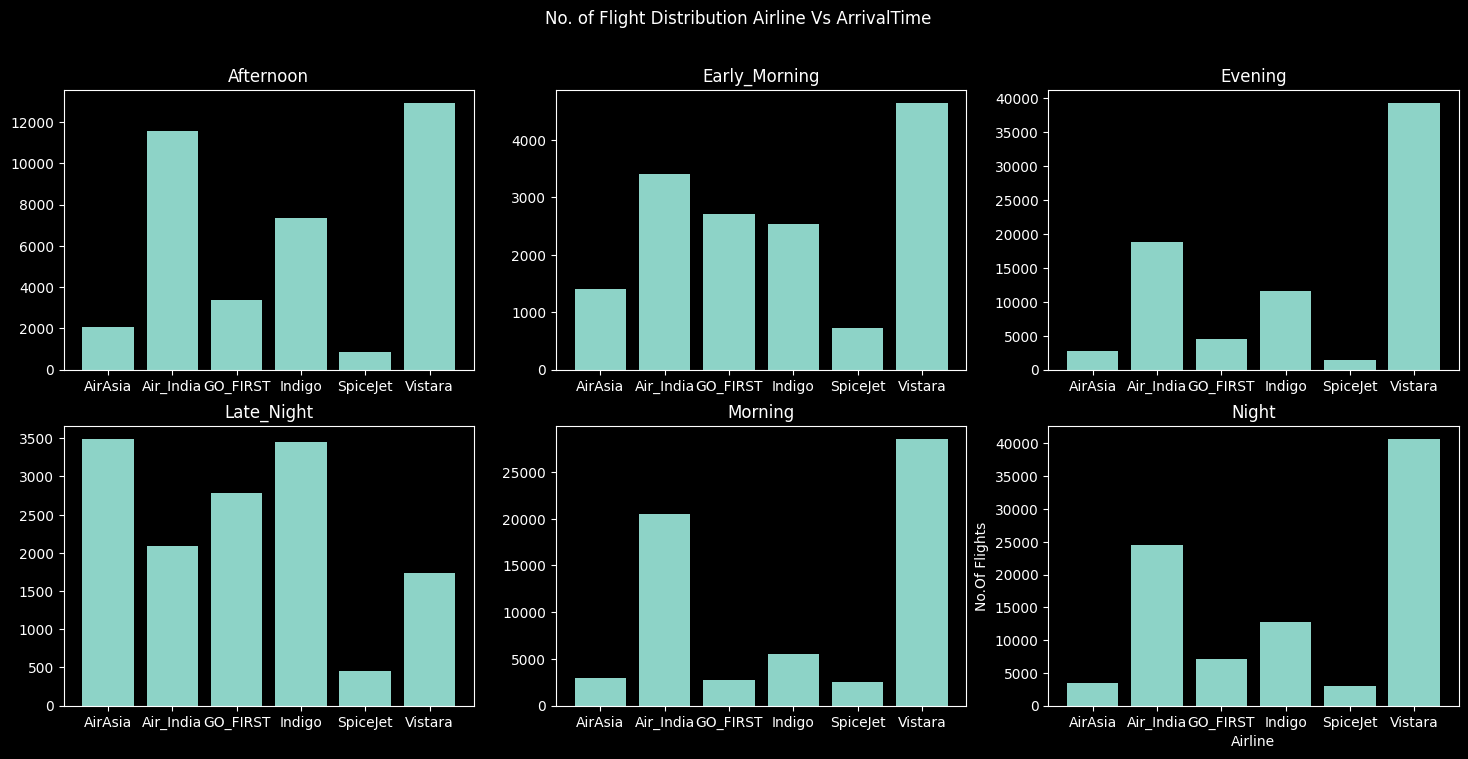

In [24]:
plt.figure(figsize=(18,8))
for index, time in enumerate(series_arrival):
    plt.subplot(2,3,1+index)
    plt.bar(airline_arrivaltime.loc[time].index,airline_arrivaltime.loc[time].values.reshape(6,))
    plt.title(time)
plt.xlabel("Airline")
plt.ylabel("No.Of Flights")
plt.suptitle("No. of Flight Distribution Airline Vs ArrivalTime")
plt.show

## Exploring Relation Price with Arrival time and Departure Time 

In [25]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [26]:
departure_time_price=df.groupby('departure_time')["price"].agg(["mean","min","max"])
departure_time_price

,mean,min,max
departure_time,,,
Afternoon,18179.203331,1105,111437
Early_Morning,20370.676718,1105,117307
Evening,21232.361894,1105,116562
Late_Night,9295.299387,2050,56058
Morning,21630.760254,1105,123071
Night,23062.146808,1105,115211


Text(0.5, 1.0, 'departure_time_price')

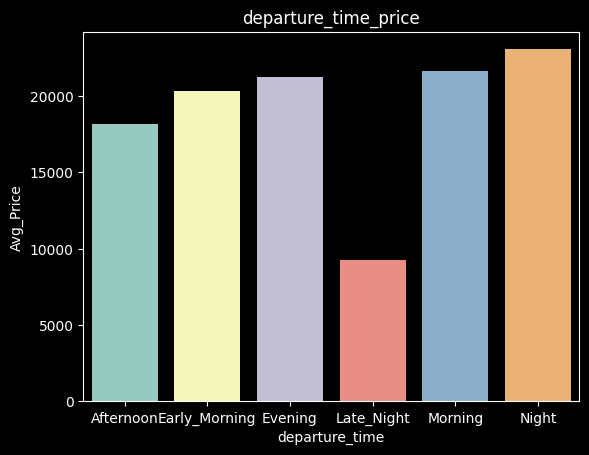

In [42]:
sns.barplot(data=departure_time_price,
       x=departure_time_price.index,
       y=departure_time_price["mean"],
       hue=departure_time_price.index)
plt.xlabel("departure_time")
plt.ylabel("Avg_Price")
plt.title("departure_time_price")

In [49]:
arrivaltime_price=df.groupby('arrival_time')["price"].agg(["mean"])
arrivaltime_price

,mean
arrival_time,
Afternoon,18494.598993
Early_Morning,14993.139521
Evening,23044.371615
Late_Night,11284.906078
Morning,22231.076098
Night,21586.758341


Text(0, 0.5, 'Mean Price')

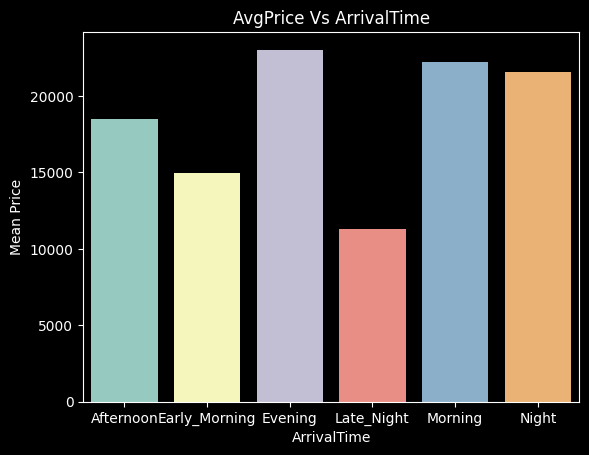

In [52]:
sns.barplot(x=arrivaltime_price.index,
            y=arrivaltime_price["mean"],
            data=arrivaltime_price,
            hue=arrivaltime_price.index)
plt.title("AvgPrice Vs ArrivalTime")
plt.xlabel("ArrivalTime")
plt.ylabel("Mean Price")

## Price Relation with Source and Destination 

In [53]:
df.columns

Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')

In [56]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [60]:
sourcecity_price=df.groupby("source_city")["price"].agg(["mean"])
sourcecity_price

,mean
source_city,
Bangalore,21469.460575
Chennai,21995.339871
Delhi,18951.326639
Hyderabad,20155.623879
Kolkata,21746.235679
Mumbai,21483.818839


Text(0.5, 1.0, 'Source_City - Avg_Price')

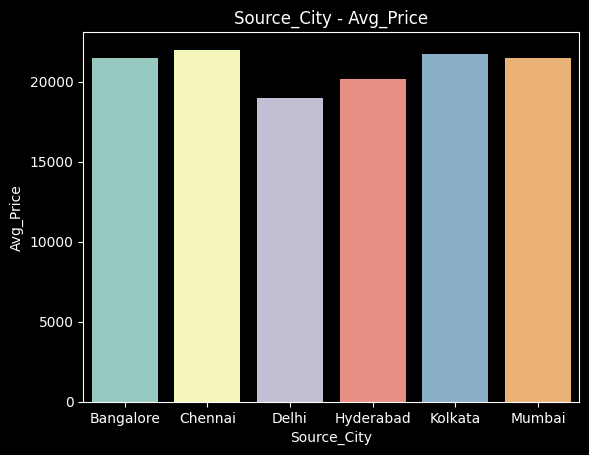

In [64]:
sns.barplot(data=sourcecity_price,
           x=sourcecity_price.index,
           y=sourcecity_price["mean"],
           hue=sourcecity_price.index)
plt.xlabel("Source_City")
plt.ylabel("Avg_Price")
plt.title("Source_City - Avg_Price")


## Price Relation with Class

In [72]:
class_price=df.groupby('class')["price"].agg(["mean"])
class_price

,mean
class,
Business,52540.081124
Economy,6572.342383


Text(0.5, 1.0, 'Class_AvgPrice')

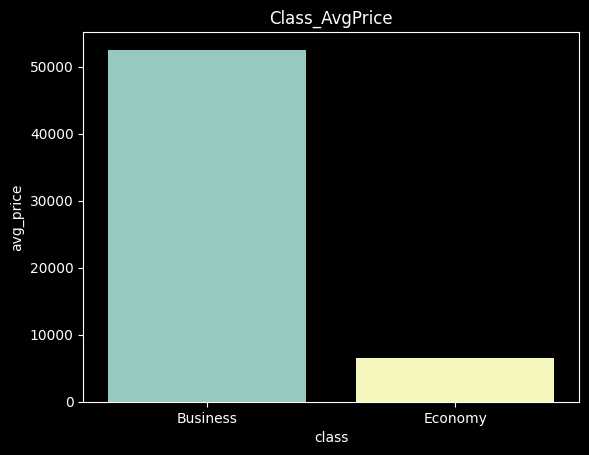

In [73]:
sns.barplot(data=class_price,
            x=class_price.index,
           y=class_price["mean"],
           hue=class_price.index)
plt.xlabel("class")
plt.ylabel("avg_price")
plt.title("Class_AvgPrice")

## What will be the Average Price of Vistara airline for a flight from Delhi to Hyderabad in Business Class 

In [78]:
df["airline"]== "Vistara"
df["source_city"] == "Delhi"
df["destination_city"] == "Hyderabad"
df["class"] == "Business"

df[(df["class"] == "Business") & (df["destination_city"] == "Hyderabad") & () ]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
219121,Air_India,AI-544,Delhi,Evening,zero,Evening,Hyderabad,Business,2.08,1,25600
219122,Air_India,AI-839,Delhi,Night,zero,Night,Hyderabad,Business,2.17,1,25600
219123,Vistara,UK-871,Delhi,Night,zero,Night,Hyderabad,Business,2.33,1,30630
219124,Vistara,UK-879,Delhi,Evening,zero,Evening,Hyderabad,Business,2.25,1,38470
219125,Air_India,AI-473,Delhi,Evening,one,Afternoon,Hyderabad,Business,17.75,1,47748
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
